# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 설정
%matplotlib inline

# 폰트 선명하게 보이게 설정
set_matplotlib_formats('retina')

# 데이터 로딩

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

# Q1
```
연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!
```
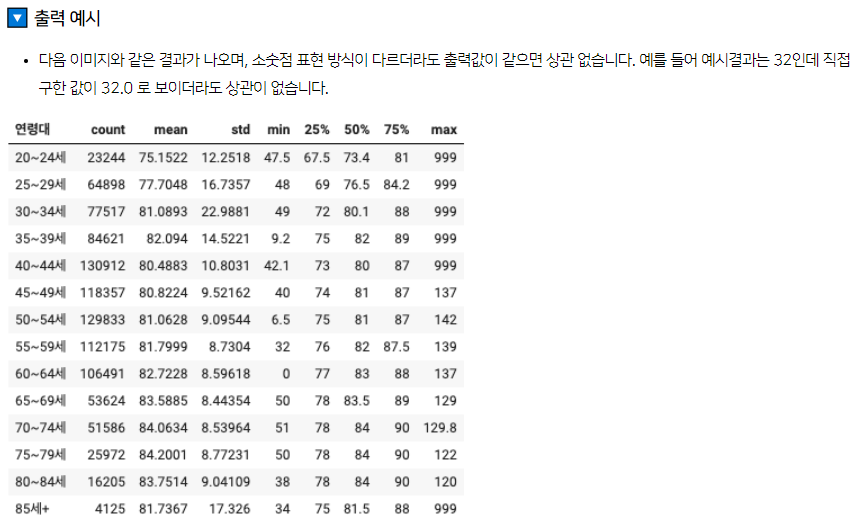

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [100]:
df = df.replace({"연령대코드(5세단위)" : age_code})
df = df.rename(columns = {"연령대코드(5세단위)": "연령대"})

In [15]:
df.groupby(["연령대"])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2. 
```
"음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.
```
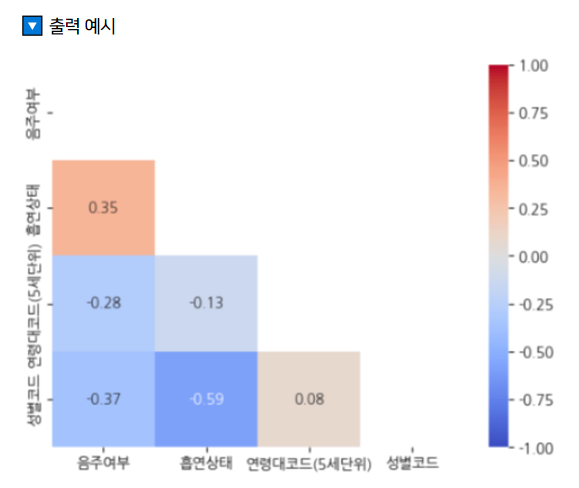

In [120]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

<AxesSubplot:>

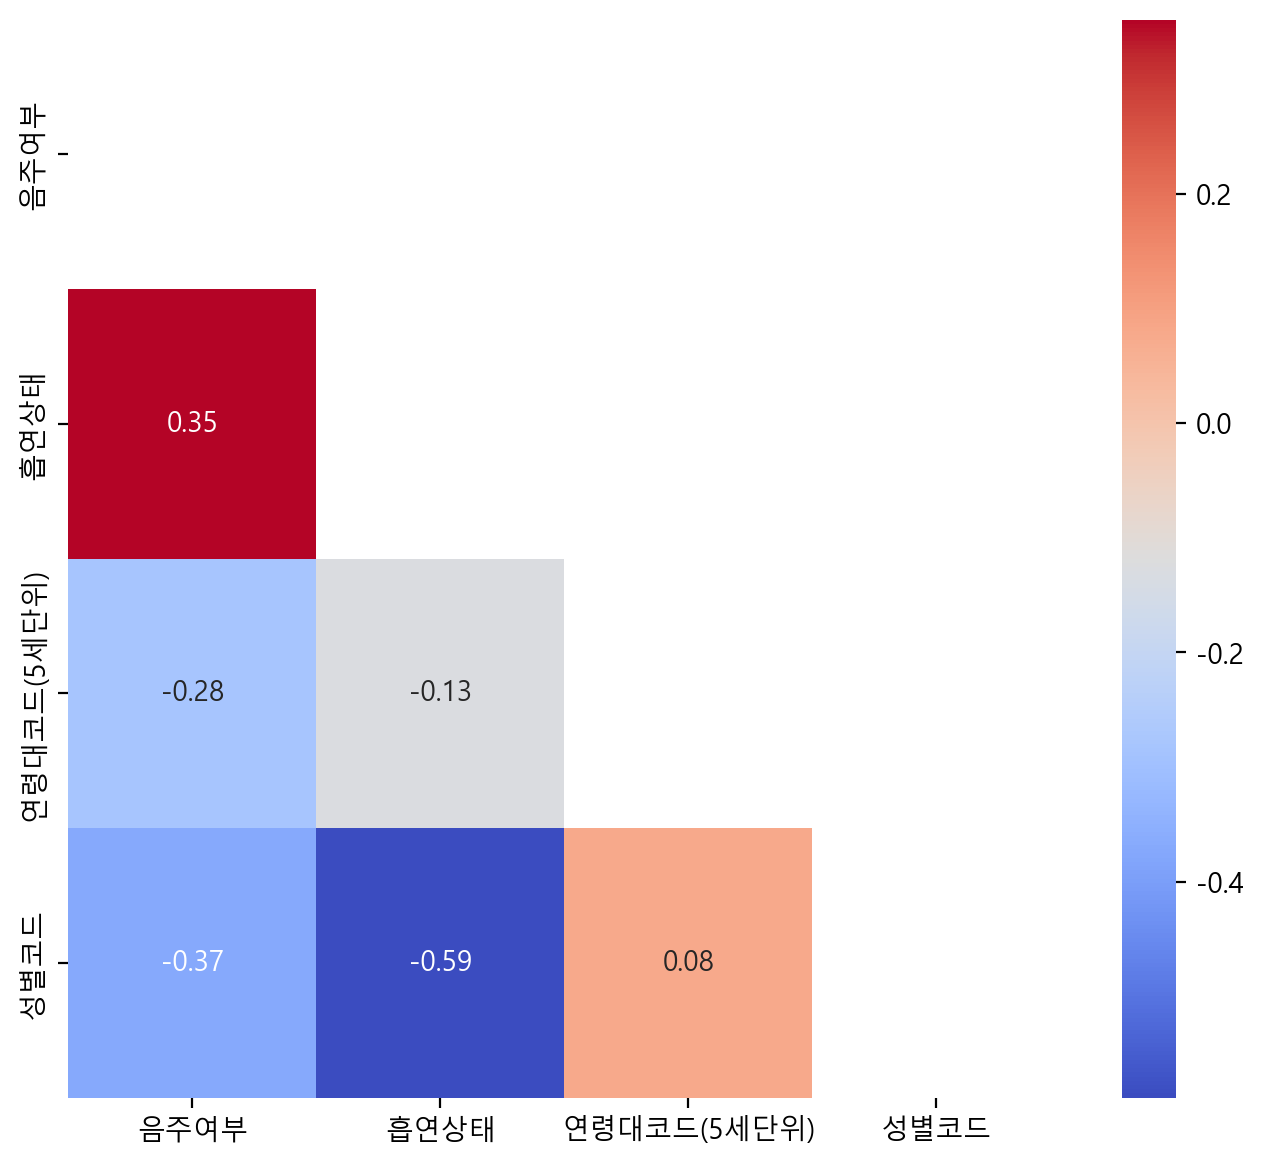

In [25]:
df_sample = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_corr = df_sample.corr()

plt.figure(figsize=(8, 7))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")

# Q3
```
흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
```
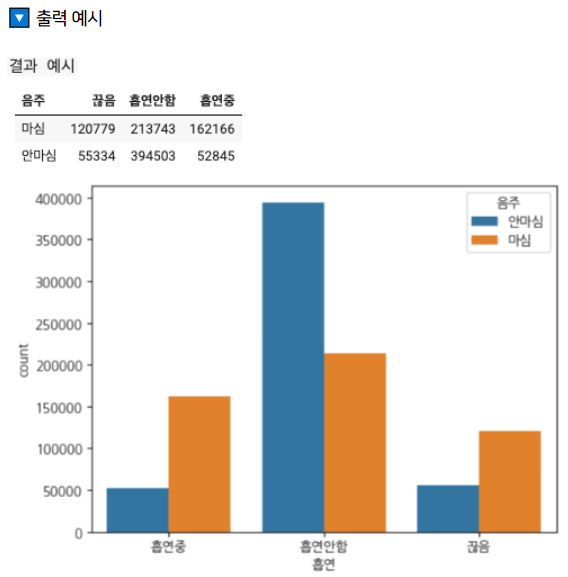

In [121]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [122]:
df = df.replace({"흡연상태" : smoke})
df = df.replace({"음주여부" : drink})

In [123]:
df_crosstab= pd.crosstab(df["음주여부"], df["흡연상태"], rownames=['음주'], colnames=None)

df_crosstab.columns.name = None

df_crosstab

,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연상태', ylabel='count'>

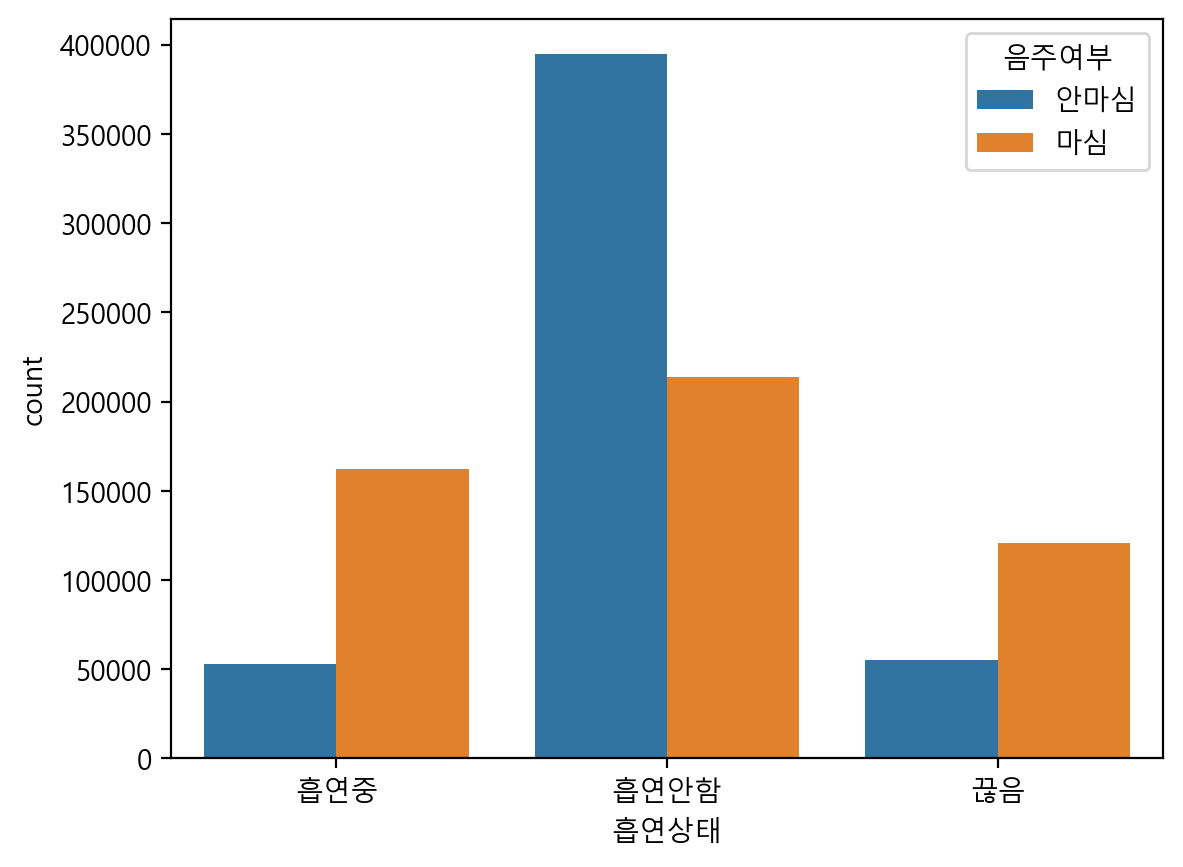

In [127]:
sns.countplot(data = df, x = "흡연상태", hue = "음주여부")

# Q4
```
체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.
```
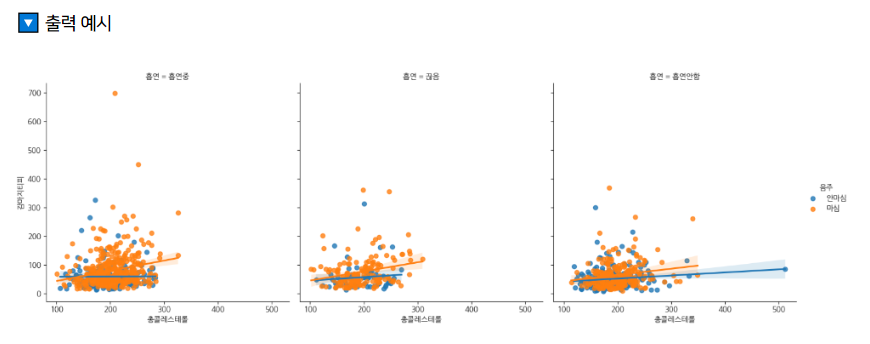

In [97]:
df_120 = df[df["체중(5Kg 단위)"] >= 120]

<Figure size 1500x400 with 0 Axes>

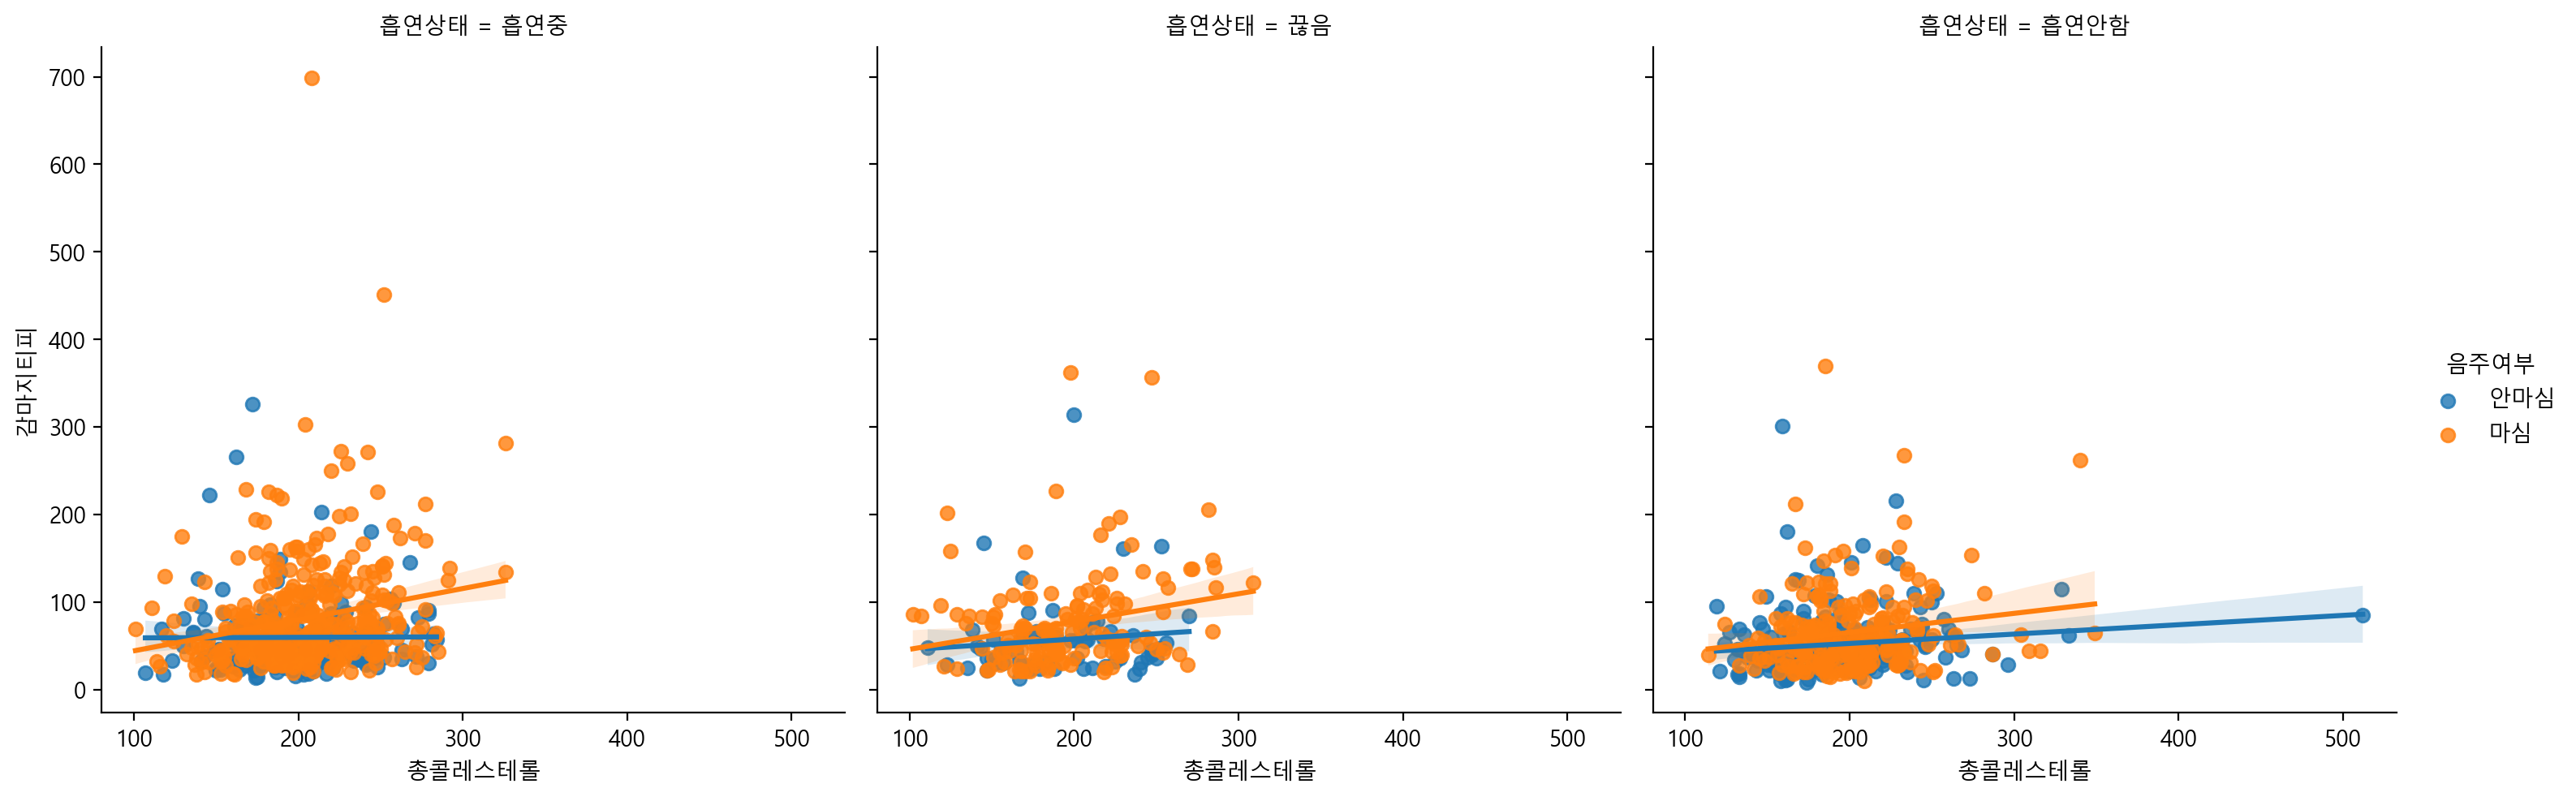

In [98]:
plt.figure(figsize=(15, 4))

sns.lmplot(data=df_120, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

 # Q5
 ```
 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.
```
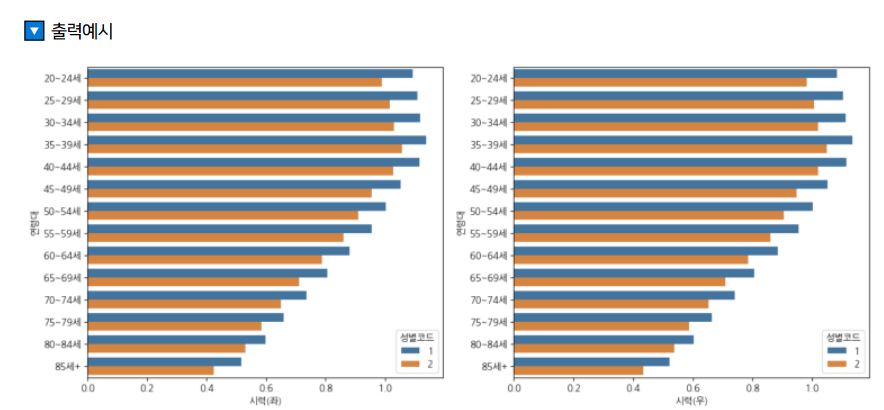

In [128]:
df = df.replace({"연령대코드(5세단위)" : age_code})
df = df.rename(columns = {"연령대코드(5세단위)": "연령대"})
df = df[(df["시력(좌)"] < 9.9) & (df["시력(우)"] < 9.9)]

In [114]:
df_left = pd.crosstab(df["연령대"], df["성별코드"], df["시력(좌)"], aggfunc="mean")

df_left.index.name = None
df_left.columns.name = None

df_left

,1,2
20~24세,1.092213,0.989032
25~29세,1.108857,1.016270
30~34세,1.116939,1.028991
35~39세,1.137394,1.057828
40~44세,1.115274,1.027355
45~49세,1.052993,0.955158
50~54세,1.002291,0.909825
55~59세,0.954886,0.860990
60~64세,0.880886,0.787743
65~69세,0.805462,0.710143


In [115]:
df_right = pd.crosstab(df["연령대"], df["성별코드"], df["시력(우)"], aggfunc="mean")

df_right.index.name = None
df_right.columns.name = None

df_right

,1,2
20~24세,1.083185,0.982924
25~29세,1.103333,1.005915
30~34세,1.112457,1.021342
35~39세,1.134962,1.050359
40~44세,1.115097,1.019694
45~49세,1.053023,0.948965
50~54세,1.001541,0.906144
55~59세,0.956148,0.859704
60~64세,0.885828,0.786190
65~69세,0.806043,0.708960


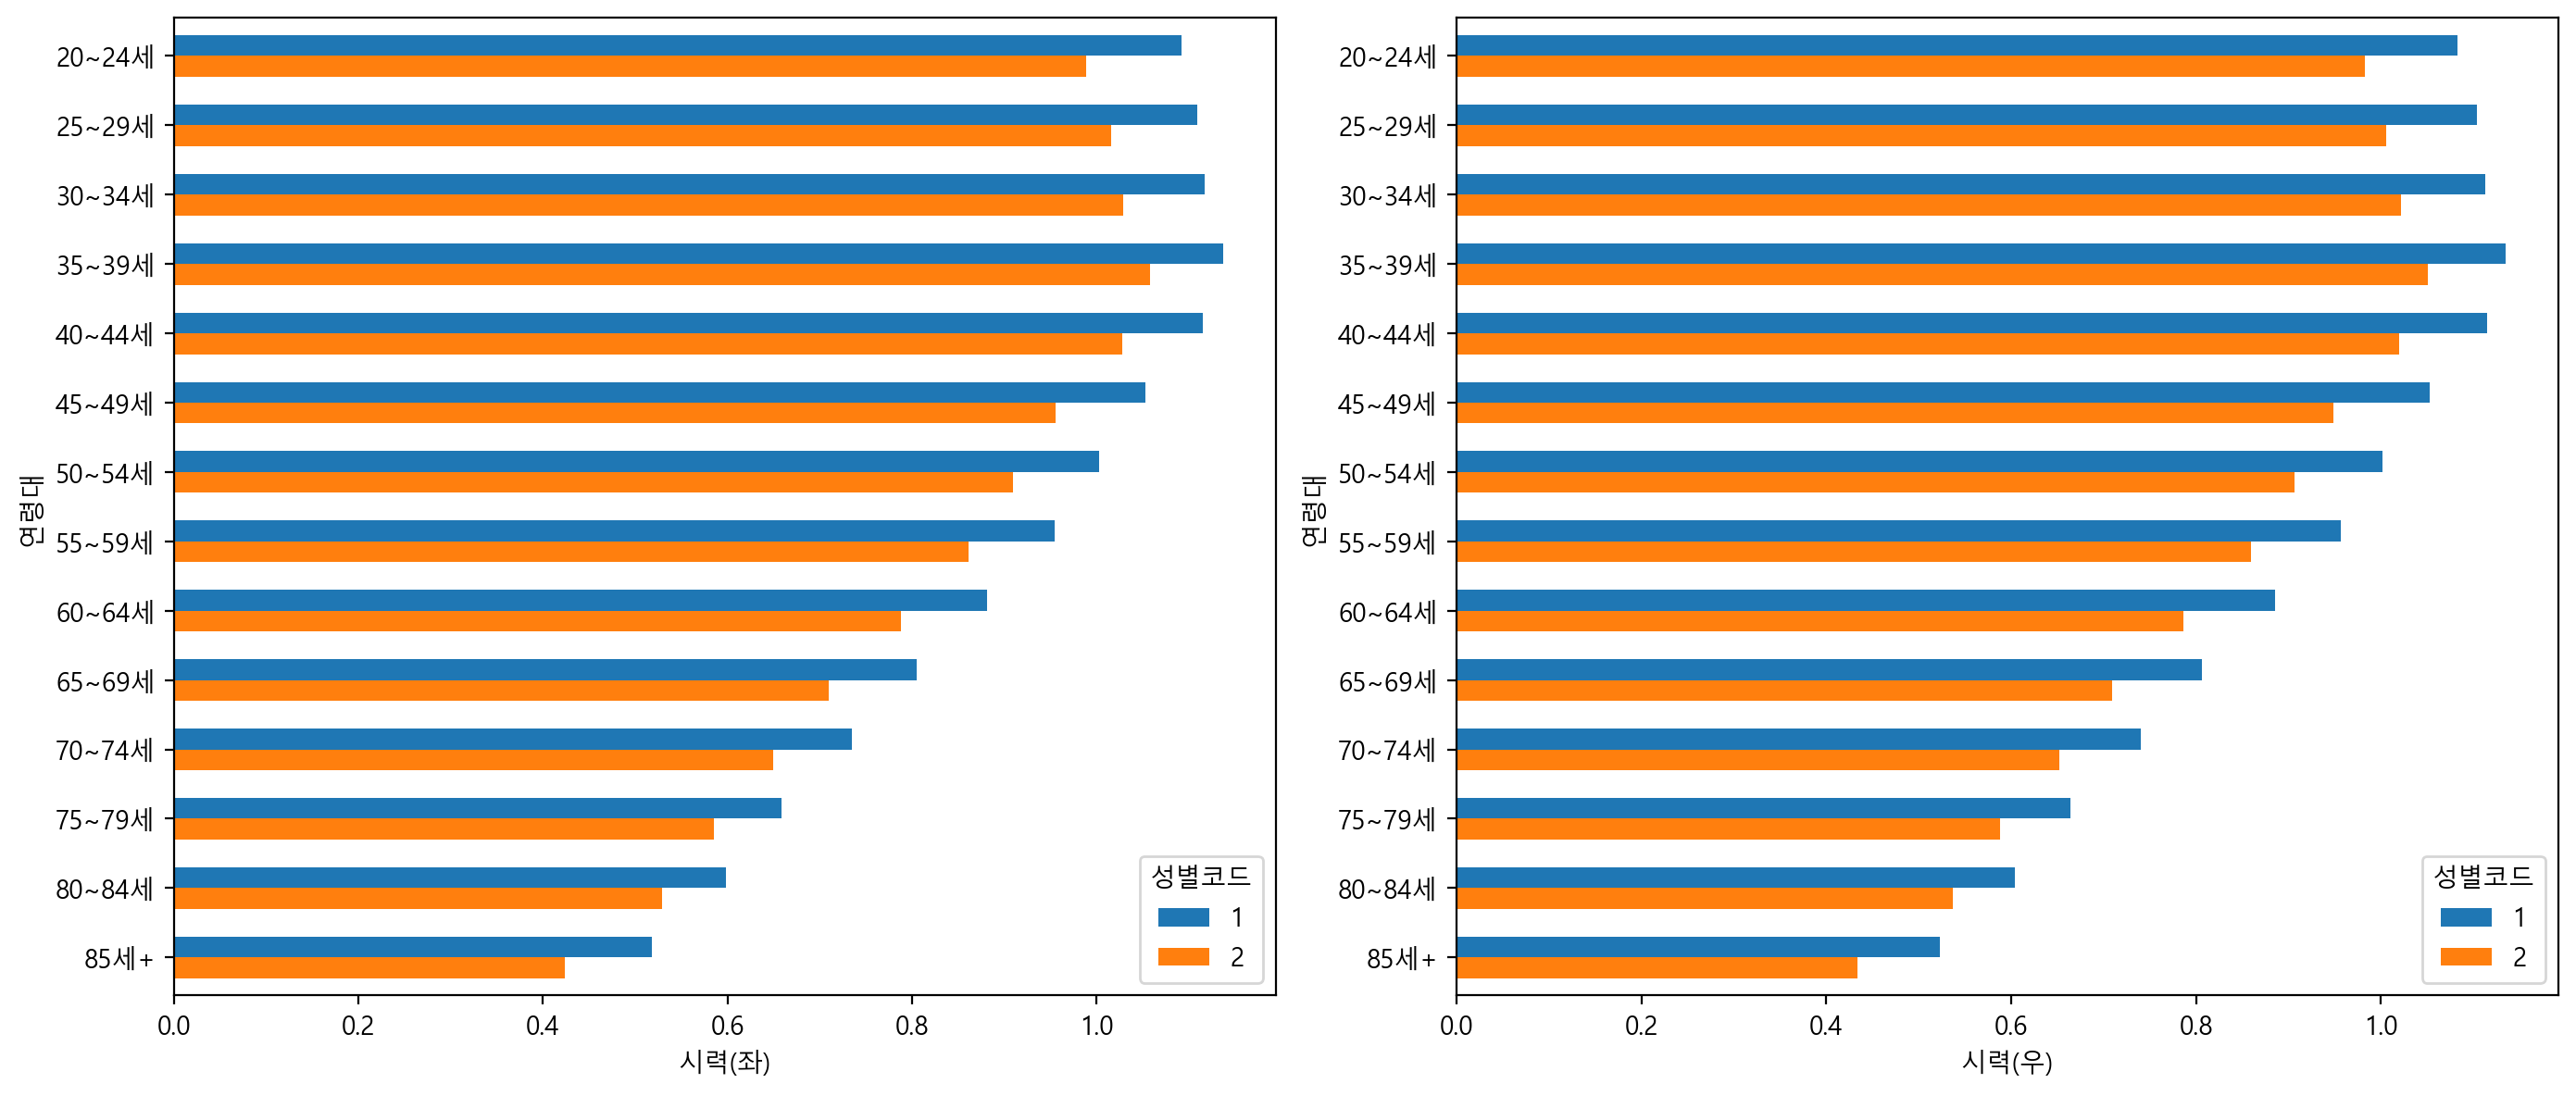

In [167]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

df_left.plot.barh(ax=ax[0], width = 0.6)
ax[0].set_xlabel("시력(좌)")
ax[0].set_ylabel("연령대")
ax[0].legend(title = "성별코드")
ax[0].invert_yaxis()

df_right.plot.barh(ax=ax[1], width = 0.6)
ax[1].set_xlabel("시력(우)")
ax[1].set_ylabel("연령대")
ax[1].legend(title = "성별코드")
ax[1].invert_yaxis()

plt.tight_layout()